In [33]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm

In [2]:
#loading data
df1=pd.read_csv(r"E:\deepa\Omdena\Project1-Identifying Potential Areas for Urban Agriculture in Milan, Italy\Zone_4-20240602T042625Z-001\Zone_4\NDVI_LST_UHI_UTFVI_30m\csv_files_median\zone4_ndvi_lst_uhi_utfvi_2023-01-01_2024-05-13.csv")

In [3]:
df1.head()

Latitude  Longitude   Zone      NDVI        FV        EM     THERMAL  \
0  45.47236   9.202701  zone4  0.342057  0.217231  0.986869  295.790287   
1  45.47236   9.202971  zone4  0.189396  0.089274  0.986357  296.067147   
2  45.47236   9.203240  zone4  0.277677  0.156443  0.986626  295.715090   
3  45.47236   9.203510  zone4  0.277677  0.156443  0.986626  295.715090   
4  45.47236   9.203779  zone4  0.607636  0.573220  0.988293  294.730701   

         LST       UHI     UTFVI  
0  25.416211 -0.110956 -0.009962  
1  25.808513  0.060960  0.005390  
2  25.391815 -0.121647 -0.010932  
3  25.391815 -0.121647 -0.010932  
4  24.033548 -0.716872 -0.068066

### Features
NDVI (Normalized Difference Vegetation Index)

FV (Fractional Vegetation)

EM (Emissivity)

THERMAL (Brightness Temperature)

LST (Land Surface Temperature)

UHI (Urban Heat Island Index)

UTFVI (Urban Thermal Field Variance Index)

In [4]:
# basic information about the dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50895 entries, 0 to 50894
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   50895 non-null  float64
 1   Longitude  50895 non-null  float64
 2   Zone       50895 non-null  object 
 3   NDVI       50895 non-null  float64
 4   FV         50895 non-null  float64
 5   EM         50895 non-null  float64
 6   THERMAL    50895 non-null  float64
 7   LST        50895 non-null  float64
 8   UHI        50895 non-null  float64
 9   UTFVI      50895 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.9+ MB
None


In [5]:
# descriptive statistics
df1.describe()


Latitude     Longitude          NDVI            FV            EM  \
count  50895.000000  50895.000000  50895.000000  50895.000000  50895.000000   
mean      45.446219      9.237735      0.426894      0.361897      0.987448   
std        0.015170      0.020305      0.202745      0.250455      0.001002   
min       45.420078      9.202701     -0.083258      0.000000      0.986000   
25%       45.433014      9.220218      0.243843      0.128488      0.986514   
50%       45.446219      9.237735      0.429166      0.315325      0.987261   
75%       45.459425      9.255253      0.613848      0.583575      0.988334   
max       45.472360      9.272770      0.829279      1.000000      0.990000   

            THERMAL           LST           UHI         UTFVI  
count  50895.000000  50895.000000  50895.000000  50895.000000  
mean     295.597141     25.097694     -0.250538     -0.036281  
std        2.586479      2.743333      1.202193      0.125523  
min      287.228147     16.276102     -4.116368     -0.577122  
25%      294.206035     23.585355     -0.913280     -0.088362  
50%      295.875737     25.374347     -0.129302     -0.011628  
75%      297.297634     26.935991      0.555047      0.047022  
max      307.121023     37.124816      5.020032      0.308565

In [6]:
# Check for missing values
print(df1.isnull().sum())

# Check for duplicates
print(df1.duplicated().sum())

# Remove duplicates if any
df1 = df1.drop_duplicates()


Latitude     0
Longitude    0
Zone         0
NDVI         0
FV           0
EM           0
THERMAL      0
LST          0
UHI          0
UTFVI        0
dtype: int64
0


No null and duplicated values

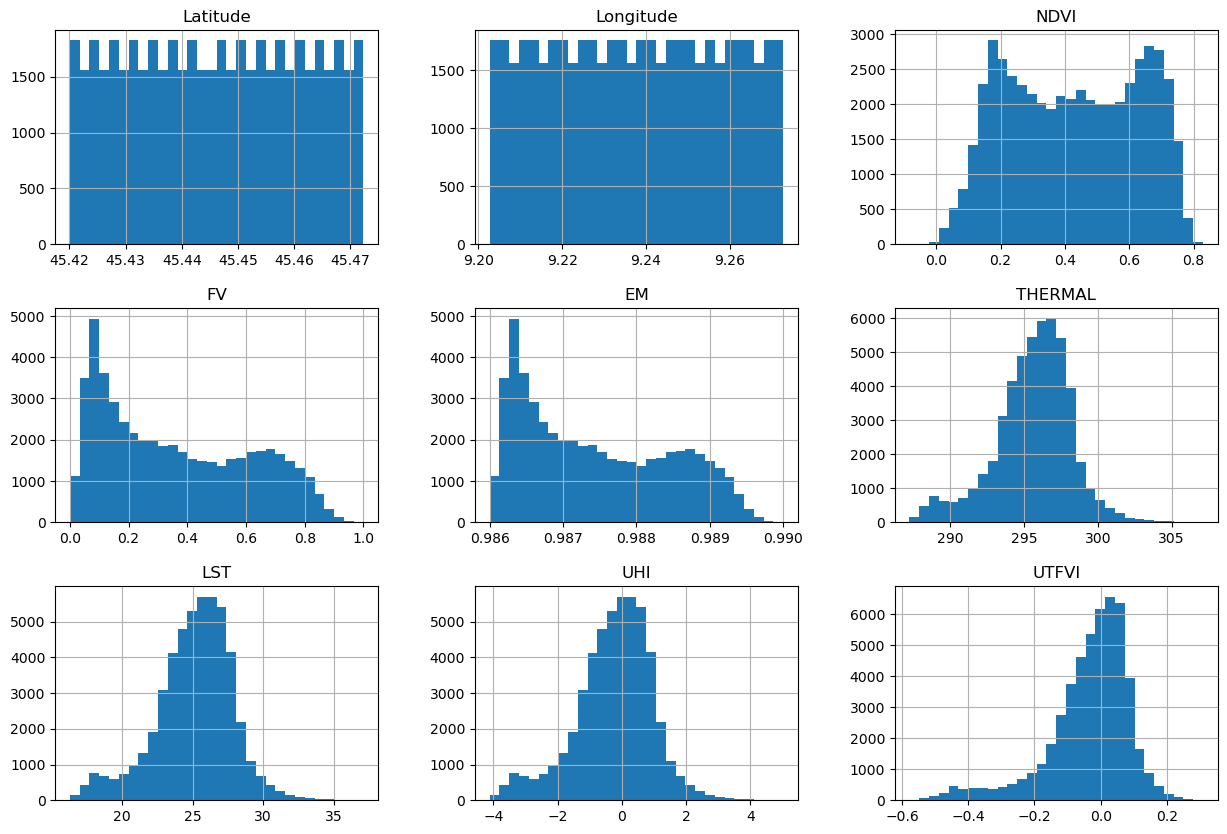

In [7]:

# Plot histograms for each numeric feature
df1.hist(bins=30, figsize=(15, 10))
plt.show()


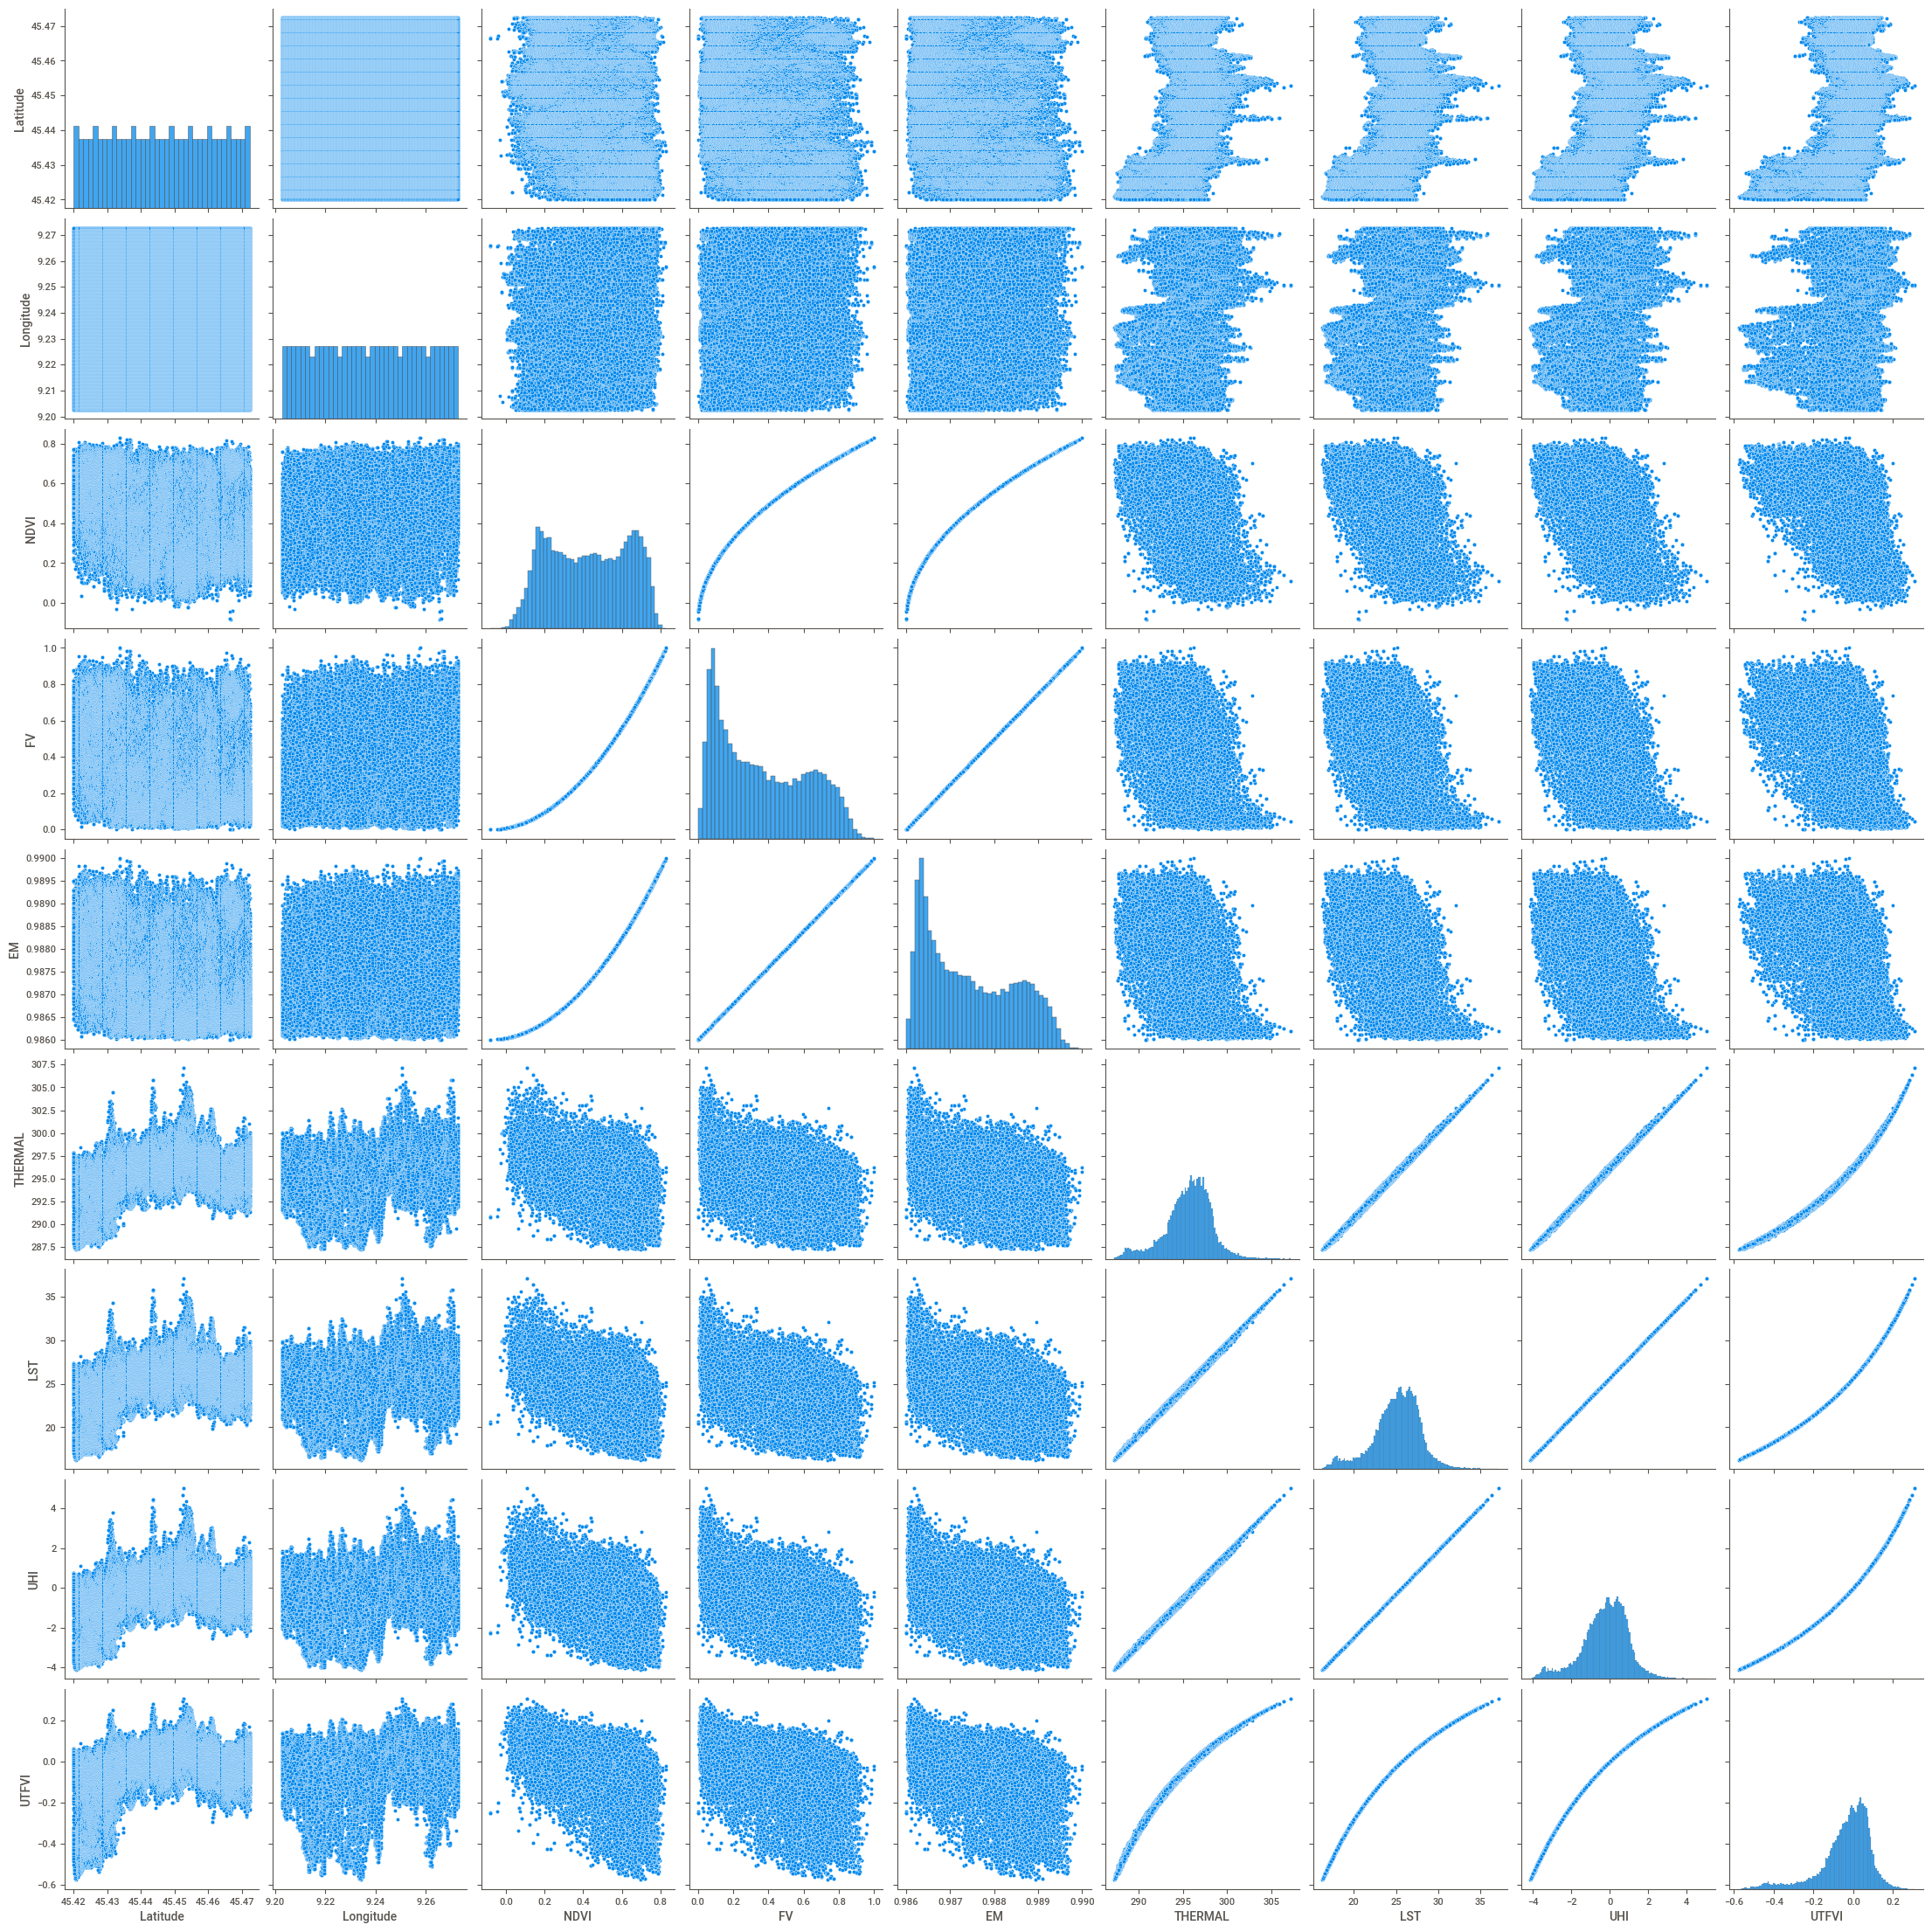

In [11]:
# Pairplot to see relationships between variables
sns.pairplot(df1)
plt.show()


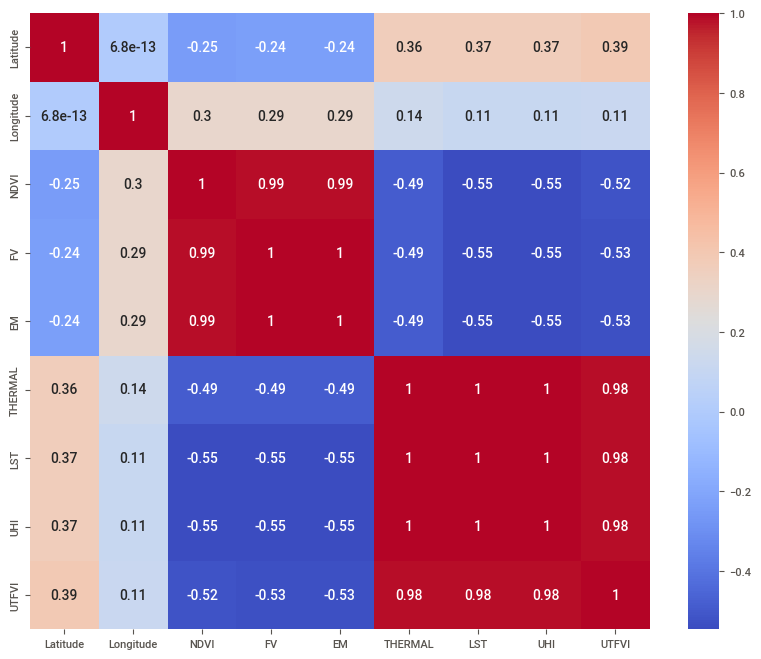

In [12]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()


1.Latitude and Longitude:

The correlation coefficient is approximately 0, indicating no linear correlation between Latitude and Longitude. 

2.Latitude and Other Variables:

The correlations between Latitude and other variables (NDVI, FV, EM, THERMAL, LST, UHI, UTFVI) are all close to 0, suggesting no significant linear relationship.

3.Longitude and Other Variables:

Similar to Latitude, Longitude also shows low correlations with other variables, indicating no substantial linear relationships.

4.NDVI and FV, as well as EM, have high positive correlations, as they represent vegetation-related measurements.

5.THERMAL, LST, UHI, and UTFVI also show high positive correlations among themselves, indicating strong associations among thermal-related variables.

In [13]:
# Displaying correlation matrix
corr_matrix = df1.corr()
corr_matrix


Latitude     Longitude      NDVI        FV        EM   THERMAL  \
Latitude   1.000000e+00  6.786644e-13 -0.246978 -0.236554 -0.236554  0.361708   
Longitude  6.786644e-13  1.000000e+00  0.296974  0.293744  0.293744  0.136808   
NDVI      -2.469784e-01  2.969737e-01  1.000000  0.985185  0.985185 -0.488741   
FV        -2.365537e-01  2.937437e-01  0.985185  1.000000  1.000000 -0.488433   
EM        -2.365537e-01  2.937437e-01  0.985185  1.000000  1.000000 -0.488433   
THERMAL    3.617078e-01  1.368082e-01 -0.488741 -0.488433 -0.488433  1.000000   
LST        3.652745e-01  1.082281e-01 -0.545993 -0.546733 -0.546733  0.997677   
UHI        3.652745e-01  1.082281e-01 -0.545993 -0.546733 -0.546733  0.997677   
UTFVI      3.919587e-01  1.118404e-01 -0.522482 -0.529521 -0.529521  0.982647   

                LST       UHI     UTFVI  
Latitude   0.365275  0.365275  0.391959  
Longitude  0.108228  0.108228  0.111840  
NDVI      -0.545993 -0.545993 -0.522482  
FV        -0.546733 -0.546733 -0.529521  
EM        -0.546733 -0.546733 -0.529521  
THERMAL    0.997677  0.997677  0.982647  
LST        1.000000  1.000000  0.984042  
UHI        1.000000  1.000000  0.984042  
UTFVI      0.984042  0.984042  1.000000

In [19]:
ndvi_descriptive_stats = df1['NDVI'].describe()
print(ndvi_descriptive_stats)


count    50895.000000
mean         0.426894
std          0.202745
min         -0.083258
25%          0.243843
50%          0.429166
75%          0.613848
max          0.829279
Name: NDVI, dtype: float64


Count: There are 50,895 data points in the dataset for NDVI.

Mean: The mean NDVI value is approximately 0.427, indicating the average vegetation index value across the dataset.

Standard Deviation (Std): The standard deviation of NDVI is approximately 0.203, which represents the spread or dispersion of NDVI values around the mean. 

Minimum (Min): The minimum NDVI value observed in the dataset is approximately -0.083. This value represents the lowest recorded vegetation index value.

25th Percentile (25%): 25% of the NDVI values are below approximately 0.244. This percentile indicates the value below which 25% of the observations fall.

50th Percentile (Median or 50%): 50% of the NDVI values are below approximately 0.429, which represents the median NDVI value. 

75th Percentile (75%): 75% of the NDVI values are below approximately 0.614. This percentile indicates the value below which 75% of the observations fall.

Maximum (Max): The maximum NDVI value observed in the dataset is approximately 0.829. This value represents the highest recorded vegetation index value.

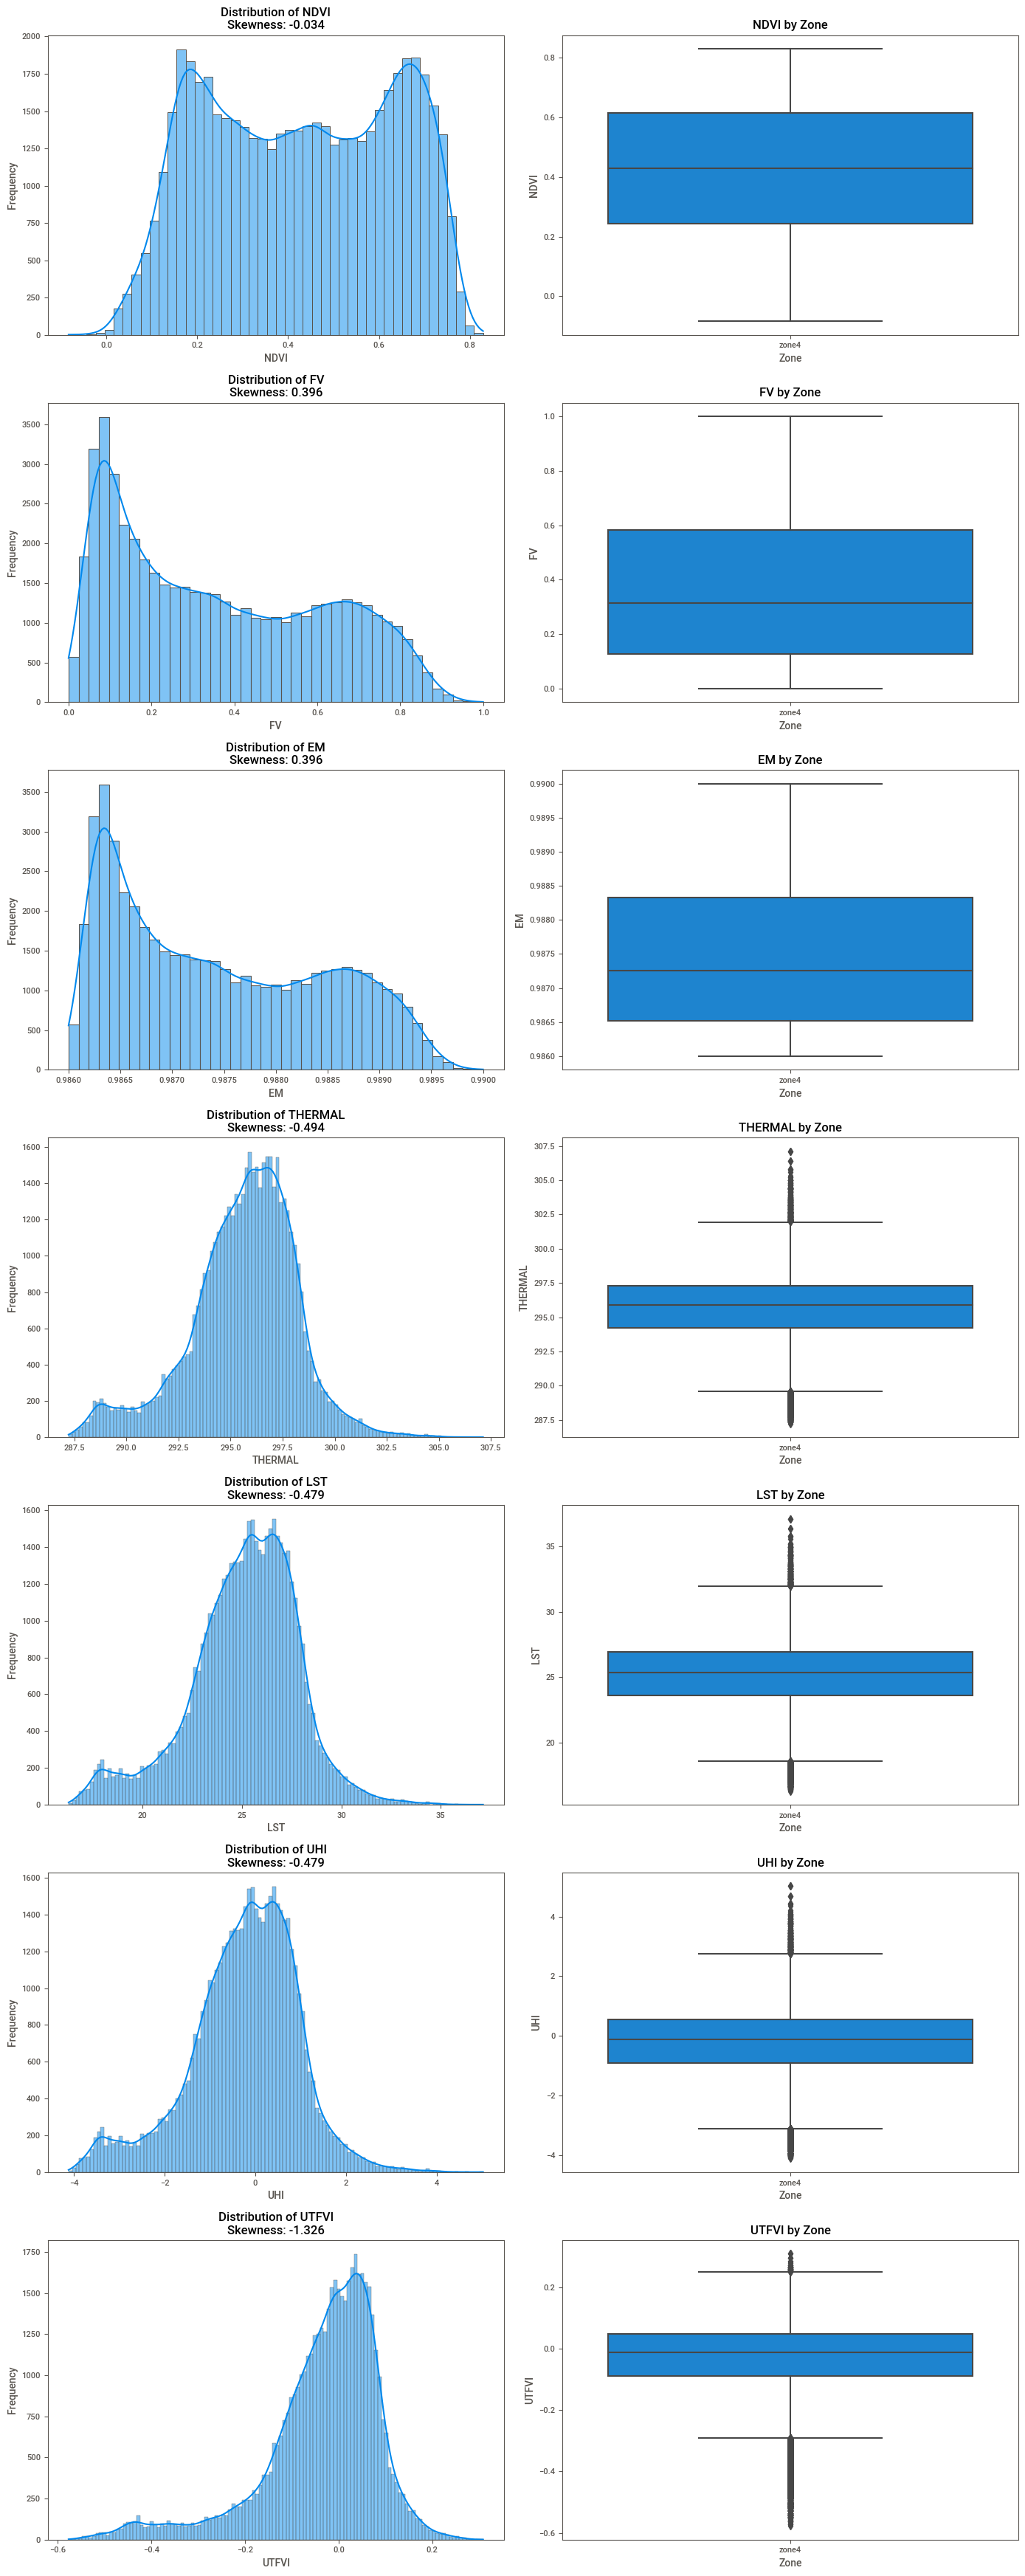

In [32]:
# Defining the columns to plot
columns = ['NDVI', 'FV', 'EM', 'THERMAL', 'LST', 'UHI', 'UTFVI']

# Number of columns
num_columns = len(columns)

# Creating subplots - 2 columns for each variable (one for histogram and one for boxplot)
fig, axes = plt.subplots(num_columns, 2, figsize=(14, num_columns * 5))

# Looping through each column and creating the plots
for idx, col in enumerate(columns):
    # Histogram with KDE
    sns.histplot(df1[col], kde=True, ax=axes[idx, 0])
    skewness = skew(df1[col])
    axes[idx, 0].set_title(f'Distribution of {col}\nSkewness: {skewness:.3f}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    
    # Boxplot by Zone
    sns.boxplot(data=df1, x='Zone', y=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'{col} by Zone')
    axes[idx, 1].set_xlabel('Zone')
    axes[idx, 1].set_ylabel(col)

# Adjusting the  layout
plt.tight_layout()
plt.show()

In [31]:
# Defining the columns to calculate skewness for
columns = ['NDVI', 'FV', 'EM', 'THERMAL', 'LST', 'UHI', 'UTFVI']

# Looping through each column and calculate skewness
for i in columns:
    skewness = skew(df1[i])
    print(f'Skewness of {i}: {skewness:.3f}')

Skewness of NDVI: -0.034
Skewness of FV: 0.396
Skewness of EM: 0.396
Skewness of THERMAL: -0.494
Skewness of LST: -0.479
Skewness of UHI: -0.479
Skewness of UTFVI: -1.326


1.NDVI (Normalized Difference Vegetation Index):

Skewness: -0.034

 The skewness value of -0.034 indicates a slight left-skewed distribution of NDVI values. This means that the distribution of NDVI values is slightly stretched towards lower values compared to a symmetrical distribution.

2.FV (Fractional Vegetation):

Skewness: 0.396

 The skewness value of 0.396 indicates a moderately right-skewed distribution of FV values. This indicates that the distribution of FV values is somewhat stretched towards higher values compared to a symmetrical distribution.


3.EM (Emissivity):

Skewness: 0.396

The skewness value of 0.396 suggests a moderately right-skewed distribution of EM values, similar to FV. This means that the distribution of EM values is somewhat stretched towards higher values.


4.THERMAL:

Skewness: -0.494

The skewness value of -0.494 indicates a moderately left-skewed distribution of THERMAL values. This implies that the distribution of THERMAL values is somewhat stretched towards lower values compared to a symmetrical distribution.


5.LST (Land Surface Temperature):

Skewness: -0.479

 The skewness value of -0.479 suggests a moderately left-skewed distribution of LST values, similar to THERMAL. This means that the distribution of LST values is somewhat stretched towards lower values.

6.UHI (Urban Heat Island):

Skewness: -0.479

 The skewness value of -0.479 indicates a moderately left-skewed distribution of UHI values, similar to THERMAL and LST. This implies that the distribution of UHI values is somewhat stretched towards lower values.

7.UTFVI (Urban Thermal Field Variance Index):

Skewness: -1.326

 The skewness value of -1.326 indicates a moderately left-skewed distribution of UTFVI values. This suggests that the distribution of UTFVI values is stretched towards lower values compared to a symmetrical distribution and is more pronouncedly left-skewed compared to other variables.